In [5]:
%matplotlib inline
 
from dit.divergences import jensen_shannon_divergence
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from dateutil.parser import parse
import plotly.graph_objs as go
from shapely.geometry import *
from datetime import datetime  
import plotly.plotly as py
import scipy.stats as st
import geopandas as gpd
from scipy import stats
import pandas as pd
import numpy as np  
import operator
import geojson
import math 
import sys 
import dit
import numpy
import pandas 
 
# path to data
venues = "../../../../raw_data/venues/Singapore_venues.txt"
transitions = "../../../../raw_data/transitions/Singapore_transitions.txt"
   
# venue ID -> opening date
venue_id_to_opening = {}  

### STEP 1: get all venues 
with open(venues, 'r') as f:
    for rows in f:
        rows = rows.split("\t")
        # unique ID 
        ID = rows[0]  
        # date
        date = rows[9].strip()  
        date_cleaned = datetime.strptime(date, '%Y-%m-%d')
        venue_id_to_opening[ID] = date_cleaned
    
# venue ID -> list of *FIRST* checkins to that venue       
venue_id_to_times = {} 
with open(transitions, 'r') as f:
    for rows in f:
        rows = rows.split("\t")
        location1 = rows[0]
        time1 = rows[1] 
        if location1 in venue_id_to_opening:
            venue_id_to_times.setdefault(location1, [])
            time_cleaned = datetime.fromtimestamp(int(time1))
            venue_id_to_times[location1].append(time_cleaned)
             
# venue id to the number of checkins to that venue 
venue_id_to_num = {}
for v in venue_id_to_opening:
    if v not in venue_id_to_times:
        continue 
    venue_id_to_num[v] = len(venue_id_to_times[v])    

# venue id to the number of checkins to that venue 
venue_id_to_num = {}
for v in venue_id_to_opening:
    if v not in venue_id_to_times:
        continue 
    venue_id_to_num[v] = len(venue_id_to_times[v])
      

In [6]:
places_opened_to_num = {}
for v in venue_id_to_opening: 
    if v not in venue_id_to_num: 
        continue 
    date = venue_id_to_opening[v]
    year = date.year
    month = date.month 
    places_opened_to_num[v] = venue_id_to_num[v]
         
# list of new venues that have at least 100 checkins 
venues_above_threshold = [venue for venue in places_opened_to_num if places_opened_to_num[venue] > 100]
print len(venues_above_threshold)

15171


In [7]:
# check if there's data last 6 months
# is there less than 12 checkins after july 2013
venues_closed = set()
# whether venue is open or closed 
venue_to_status = {}
for v in venues_above_threshold:
    if v not in venue_id_to_times: 
        continue
    times = venue_id_to_times[v]
    checkins_after = 0
    for date in times:
        year = date.year
        month = date.month
        if year == 2013 and month > 6 or year > 2014:
            checkins_after += 1 
    if checkins_after <= 6: # less than one checkin a month
        venues_closed.add(v)     
        venue_to_status[v] = 0
    else: 
        venue_to_status[v] = 1 

In [8]:
num_closed = 0

date_comparison = datetime.strptime('Jul2013', '%b%Y')
max_possible = datetime.strptime('Jun2011', '%b%Y')   
max_possible = date_comparison - max_possible
arr_days_open = []

for v in venues_above_threshold:  
    num_closed += 1 
    delta = date_comparison - venue_id_to_opening[v]
    arr_days_open.append(delta.days) 
    
print max_possible
print len(arr_days_open)

761 days, 0:00:00
15171


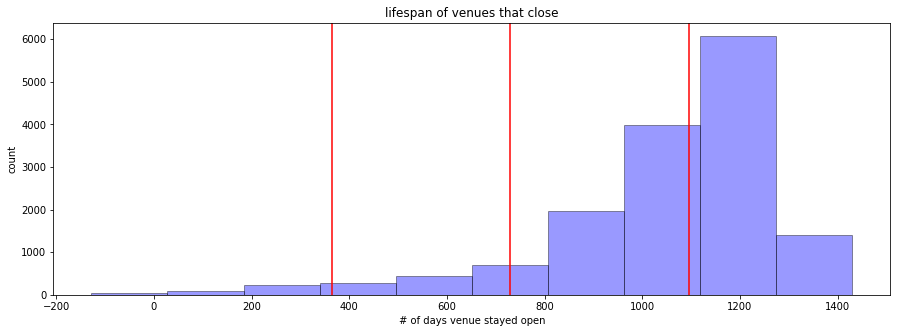

In [9]:
plt.figure(figsize=(15, 5))
array_bins, bins, patches = plt.hist(arr_days_open, 10, facecolor='blue', alpha=0.4, edgecolor="k")
plt.axvline(x=365, c='r')
plt.axvline(x=365*2, c='r')
plt.axvline(x=365*3, c='r')

plt.xlabel('# of days venue stayed open')
plt.ylabel('count')
plt.title("lifespan of venues that close")